## Objectives
The goal of this project is to conclude, Do western countries import more (trade_usd) than non-western countires? 

## Uploading Tools and Data

In [1]:
# importing tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# removes scientific notation if needed
pd.options.display.float_format = '{:.2f}'.format

# Loading data and quick overview
df= pd.read_csv('commodity_trade_statistics_data.csv',low_memory=False)
df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,010410,"Sheep, live",Export,6088,2339.00,Number of items,51.00,01_live_animals
1,Afghanistan,2016,010420,"Goats, live",Export,3958,984.00,Number of items,53.00,01_live_animals
2,Afghanistan,2008,010210,"Bovine animals, live pure-bred breeding",Import,1026804,272.00,Number of items,3769.00,01_live_animals
3,Albania,2016,010290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.00,Number of items,6853.00,01_live_animals
4,Albania,2016,010392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.00,Number of items,96040.00,01_live_animals


## Quick Overview / Exploratory Analysis / Data Cleaning

The data is too large to load into google sheets or excel, using describe will help get a better understanding of the data set.

In [2]:
#checking data types
df.dtypes

country_or_area     object
year                 int64
comm_code           object
commodity           object
flow                object
trade_usd            int64
weight_kg          float64
quantity_name       object
quantity           float64
category            object
dtype: object

Since there is only year in the year column it won't creat an issue leaving it as int. All other categories seem fine so no conversion is needed.

In [3]:
# describe will give a quick overview of the data
df.describe()

,year,trade_usd,weight_kg,quantity
count,8225871.00,8225871.00,8097396.00,7921014.00
mean,2004.77,95053697.78,35565029.12,267146969.74
std,7.04,7074153664.80,2479276993.31,373923087514.82
min,1988.00,1.00,0.00,0.00
25%,1999.00,11072.00,1089.00,1062.00
50%,2005.00,153416.00,26898.00,27120.00
75%,2011.00,1895476.50,447443.25,462362.00
max,2016.00,2443310524064.00,1860133241000.00,1026356999296000.00


Now I know the data consist of trades from 1988 to 2016 with about 8.23 million rows. Some things to check on would be the max and min values as they appear very large for one given trade.

After sorting for total_usd the max is a collection of a country's trade spending for the year along with its corresponding flow listed as 'ALL COMMODITIES'. All Commodities will not be dropped as it can be used to group the countries when creating the aggregations and graphing, and will be filtered out when individual commodities are to be analysed. Other than the max values and All Commodities there are two other issues that need to be addressed:
1. EU-28 is not a country but a collection of countries that are individually displayed as well
2. There are quite a few nan values with the top traded rows

In [4]:
# Sorted chart based on trade_usd to check what was the most expensive purchase
df.sort_values('trade_usd', ascending=False)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
8219557,EU-28,2011,TOTAL,ALL COMMODITIES,Import,2443310524064,NaN,No Quantity,NaN,all_commodities
8225576,USA,2014,TOTAL,ALL COMMODITIES,Import,2410855476207,NaN,No Quantity,NaN,all_commodities
8219555,EU-28,2012,TOTAL,ALL COMMODITIES,Import,2354197805119,NaN,No Quantity,NaN,all_commodities
8218441,China,2014,TOTAL,ALL COMMODITIES,Export,2342292696320,NaN,No Quantity,NaN,all_commodities
8219552,EU-28,2014,TOTAL,ALL COMMODITIES,Export,2339708921132,NaN,No Quantity,NaN,all_commodities
...,...,...,...,...,...,...,...,...,...,...
1980174,Guyana,2010,240110,"Tobacco, unmanufactured, not stemmed or stripped",Re-Export,1,120.00,Weight in kilograms,120.00,24_tobacco_and_manufactured_tobacco_substitutes
1980173,Guyana,2010,240110,"Tobacco, unmanufactured, not stemmed or stripped",Export,1,120.00,Weight in kilograms,120.00,24_tobacco_and_manufactured_tobacco_substitutes
6375379,Colombia,2015,740821,"Wire, copper-zinc base alloy",Export,1,4.00,Weight in kilograms,4.00,74_copper_and_articles_thereof
4704698,Aruba,2016,560121,"Wadding, products, of cotton, except sanitary ...",Export,1,1.00,Weight in kilograms,1.00,56_wadding_felt_nonwovens_yarns_twine_cordage_etc


In [5]:
# checking if the EU-28 and countries are indavidually listed
df['country_or_area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Isds', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'EU-28', 'Faeroe Isds', 'Fiji', 'Finland',
       'Fmr Fed. Rep. of Germany', 'Fmr 

After checking all the unique countries_or_area's EU-28 is not the group in the data set, there is also So. African Customs Union which will be removed aswell.

### 1. Removing 'EU-28' and 'So. African Customs Union' Rows

In [6]:
# Drop ALL COMMODITIES
df = df[df.country_or_area != 'EU-28']
df = df[df.country_or_area != 'So. African Customs Union']


# checking if EU-28 was dropped
df.loc[df['country_or_area'].str.contains('EU-28', case=False)]

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category


In [7]:
# checking for So. African Customs Union
df.loc[df['country_or_area'].str.contains('So. African Customs Union', case=False)]

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category


Now that all the 'EU-28'and 'So. African Customs Union' rows have been dropped we can focus on nan values.

### 2. Dropping nan Values

Checking for the percentage of nan values will help address if there is a need to drop them or will be an impact of dropping them.

In [8]:
# Checking percentage of nan's in df
df.isnull().sum()*100/len(df)


country_or_area   0.00
year              0.00
comm_code         0.00
commodity         0.00
flow              0.00
trade_usd         0.00
weight_kg         1.57
quantity_name     0.00
quantity          3.72
category          0.00
dtype: float64

The only columns that have nan values are 'quantity' and 'weight_kg' with weight having a 4% total nan values and quantity having 2% out of 8million rows. Since the main objective of this report is to compare 'trade_usd', Since the a lot of the groupings will be through those rows that have 'ALL COMMODITIES', which also have nan values, it would be problematic to remove the rows.

<AxesSubplot:xlabel='trade_usd'>

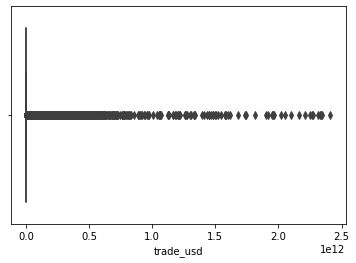

In [9]:
#cheaking for any outliers
sns.boxplot(x=df['trade_usd'])

The only columns that have nan values are 'quantity' and 'weight_kg' with weight having a 4% total nan values and quantity having 2% out of 8million rows. Since the main objective of this report is to compare 'trade_usd', Since a lot of the groupings will be through those rows that have 'ALL COMMODITIES', which also have nan values, it would be problematic to remove the rows.

### Seperating Countries Based Economic West(1) and The Rest of the world(0)

The term western countries can be defined in a few ways, Latin West, Cold War West, and the the more common now Economic West. Economic West will be used to compare levels of imports and exports between western countries and other non-western/non-economic western countries. Economic West is defined by those countries that have a GDP per capita over $10,000. A source will be provided for a better understanding and how Economic West countries were determined.

Source: https://sashamaps.net/docs/maps/list-of-western-countries/

Creating a column for the economic west will help group the countries in tableau.

In [10]:
# mapping all the economic west countries (1) and non (0)
def E_West(west):
    if west == 'Andorra' or west == 'Antigua and Barbuda'or west == 'Argentina'or west == 'Australia'or west == 'Austria'or west == 'Bahamas'or west == 'Barbados'or west == 'Belgium'or west == 'Canada'or west == 'Chile'or west == 'Costa Rica'or west == 'Croatia'or west =='Cyprus'or west == 'Czech Republic'or west == 'Denmark'or west == 'Estonia'or west == 'Finland'or west == 'France'or west == 'Germany'or west == 'Greece'or west == 'Hungary'or west == 'Iceland'or west == 'Ireland'or west == 'Italy'or west == 'Latvia'or west == 'Liechtenstein'or west == 'Lithuania'or west == 'Luxembourg'or west == 'Malta'or west == 'Monaco'or west == 'Netherlands'or west == 'New Zealand'or west == 'Norway'or west == 'Panama'or west == 'Poland'or west == 'Portugal'or west == 'St. Kitts and Nevis'or west == 'San Marino'or west == 'Slovakia'or west == 'Slovenia'or west == 'Spain'or west == 'Sweden'or west == 'Switzerland'or west == 'Trinidad and Tobago'or west == 'United Kingdom'or west == 'USA'or west == 'Uruguay'or west == 'Vatican City':
        return (1)
    else:
        return (0)

# mapping each country to 1 or 0 if west or not
df['Economic West'] = df['country_or_area'].map(E_West)

# checking if mapped correctly
test = df.groupby('country_or_area').agg(E_West=('Economic West', 'mean'))
test.loc[test['E_West'] == 1.00]

,E_West
country_or_area,
Andorra,1.00
Antigua and Barbuda,1.00
Argentina,1.00
Australia,1.00
Austria,1.00
Bahamas,1.00
Barbados,1.00
Belgium,1.00
Canada,1.00


## Graphing & Analysis

### Imports (usd)

First order of business is to answer analysis question, do western countries import more (trade_usd) than non-western countries?

Creating data frames to aggrigate and view the graphs.

In [11]:
# filtering for all import commodities(usd) of each country and grouping by west(1) vs reast of the world(0) 
# used all commodities because it has the total trade_usd for the year

Import_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
Import_df = Import_df.loc[Import_df['commodity']== 'ALL COMMODITIES'] # filterd for all commodities import

# checking to make sure filtered correctly
Import_df.head() 

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Economic West
8216686,Afghanistan,2016,TOTAL,ALL COMMODITIES,Import,6534140413,NaN,No Quantity,NaN,all_commodities,0
8216688,Afghanistan,2015,TOTAL,ALL COMMODITIES,Import,7722865049,NaN,No Quantity,NaN,all_commodities,0
8216690,Afghanistan,2014,TOTAL,ALL COMMODITIES,Import,7697178170,NaN,No Quantity,NaN,all_commodities,0
8216692,Afghanistan,2013,TOTAL,ALL COMMODITIES,Import,8554413749,NaN,No Quantity,NaN,all_commodities,0
8216694,Afghanistan,2012,TOTAL,ALL COMMODITIES,Import,6204984101,NaN,No Quantity,NaN,all_commodities,0


In [12]:
# grabbing the number values for each of the agg
Import_df.groupby('Economic West')['trade_usd'].mean()

Economic West
0    40704605583.97
1   145413823178.23
Name: trade_usd, dtype: float64

Figure I1

<AxesSubplot:title={'center':'Total Import spending, West vs Non-West'}, xlabel='Economic West'>

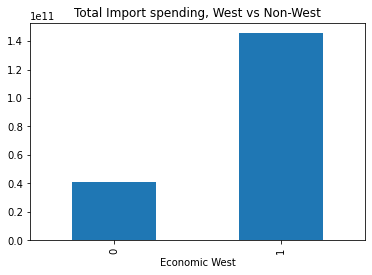

In [13]:
# graphing the agg above
Import_df.groupby('Economic West')['trade_usd'].mean().plot(kind='bar', title='Total Import spending, West vs Non-West')

<AxesSubplot:xlabel='year', ylabel='trade_usd'>

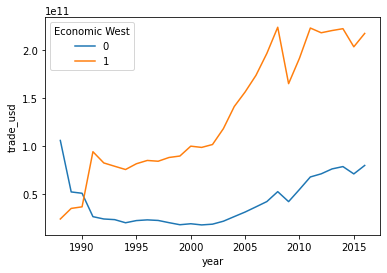

In [29]:
sns.lineplot(data=Import_df, x='year', y='trade_usd', hue='Economic West', ci=None)

Graph I1

### Graph I1 Analysis

Based on an over view of Figure I1 and Graph I1, Western countries have spent vastly more on average than that of non-western countries, about $105,000,000,000USD more. Which was expected but not to such a large degree.  A graph is made to compare western countries (Graph I2) and a separate graph for non-western countries (Graph I3).

In [15]:
# creating df for all Western Countries to compare them.
EWest_import_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
EWest_import_df = EWest_import_df.loc[EWest_import_df['commodity']== 'ALL COMMODITIES'] # filterd for all commodities import
EWest_import_df = EWest_import_df.loc[EWest_import_df['Economic West']== 1] # filtering for west countries

# testing
EWest_import_df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Economic West
8216809,Andorra,2014,TOTAL,ALL COMMODITIES,Import,1556048540,NaN,No Quantity,NaN,all_commodities,1
8216811,Andorra,2013,TOTAL,ALL COMMODITIES,Import,1487194105,NaN,No Quantity,NaN,all_commodities,1
8216813,Andorra,2012,TOTAL,ALL COMMODITIES,Import,1417733795,NaN,No Quantity,NaN,all_commodities,1
8216816,Andorra,2011,TOTAL,ALL COMMODITIES,Import,1617690977,NaN,No Quantity,NaN,all_commodities,1
8216819,Andorra,2010,TOTAL,ALL COMMODITIES,Import,1540506337,NaN,No Quantity,NaN,all_commodities,1


<AxesSubplot:title={'center':'Total Import spending, West'}, xlabel='country_or_area'>

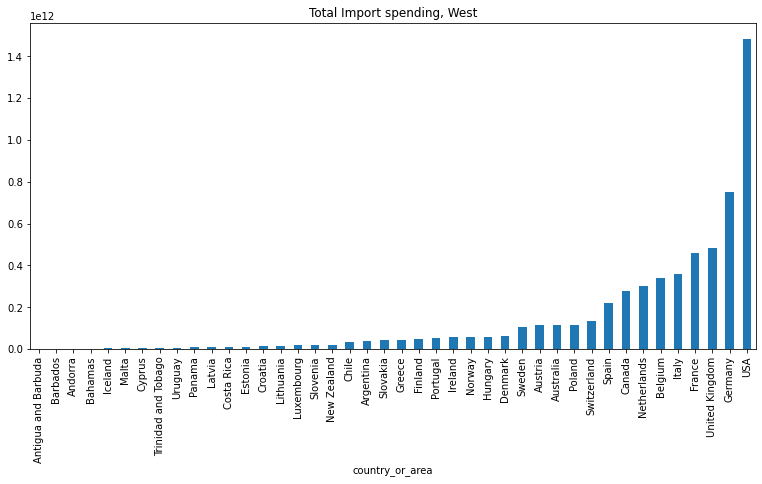

In [16]:
# west import spending 
EWest_import_df.groupby('country_or_area')['trade_usd'].mean().sort_values().plot(kind='bar',title='Total Import spending, West', figsize=(13,6)) # graphing the countries

Graph I2

In [30]:
# creating the agg for non-western countries to graph
nwest_import_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
nwest_import_df = nwest_import_df.loc[nwest_import_df['commodity']== 'ALL COMMODITIES'] # filterd out all commodities to look at specific imports for more info and analysis
nwest_import_df = nwest_import_df.loc[nwest_import_df['Economic West']== 0] # filtering for non-west countries

# testing results
nwest_import_df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Economic West
8216686,Afghanistan,2016,TOTAL,ALL COMMODITIES,Import,6534140413,NaN,No Quantity,NaN,all_commodities,0
8216688,Afghanistan,2015,TOTAL,ALL COMMODITIES,Import,7722865049,NaN,No Quantity,NaN,all_commodities,0
8216690,Afghanistan,2014,TOTAL,ALL COMMODITIES,Import,7697178170,NaN,No Quantity,NaN,all_commodities,0
8216692,Afghanistan,2013,TOTAL,ALL COMMODITIES,Import,8554413749,NaN,No Quantity,NaN,all_commodities,0
8216694,Afghanistan,2012,TOTAL,ALL COMMODITIES,Import,6204984101,NaN,No Quantity,NaN,all_commodities,0


<AxesSubplot:title={'center':'Total Import spending, Non-West'}, xlabel='country_or_area'>

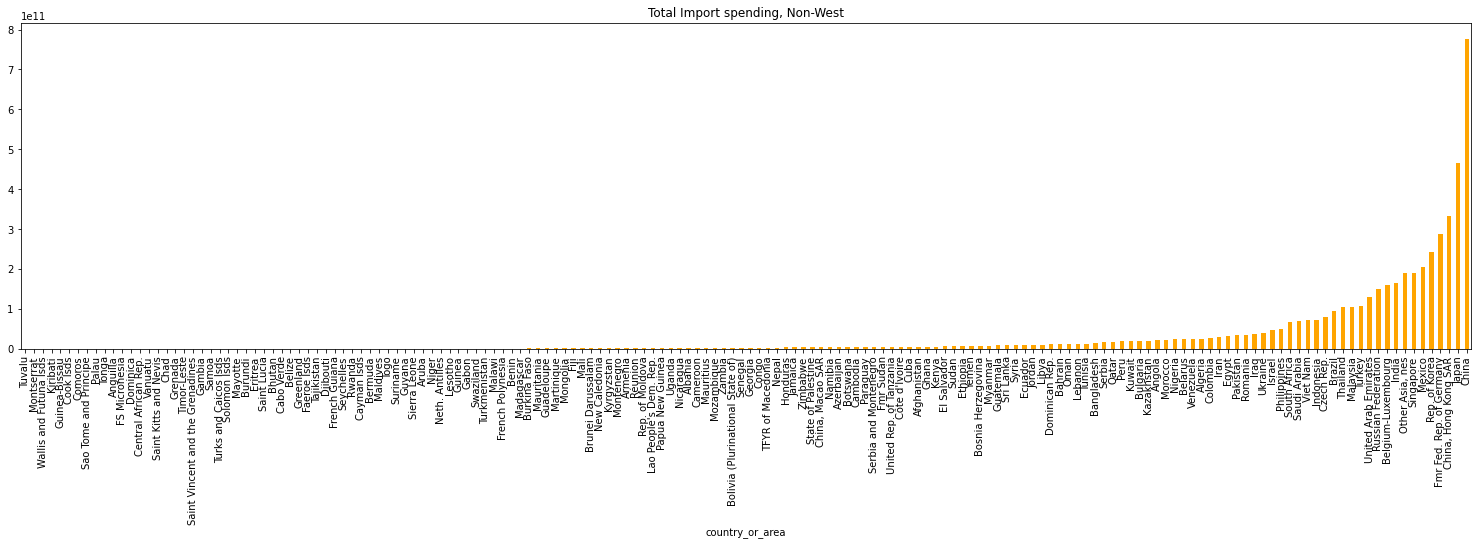

In [33]:
# Graphing non-western countries
nwest_import_df.groupby('country_or_area')['trade_usd'].mean().sort_values().plot(kind='bar',title='Total Import spending, Non-West', color='orange', figsize=(26,6))  # graphing the countries

Graph I3

### Graph I2 & I3 Analysis

Graphs I2 and I3 explain the large difference in avg trade_usd. Due to the sheer number of non-western countries and their low number in trade_usd, and with many of them who’s bars are not even visible on the graph, it is excepted for the average trade_usd to be pulled lower and display such a dramatic difference between the two groups. Although the larger players in both graphs I2 and I3 seem more competitive, a separate group to compare the two would be a good insight.

In [19]:
# top 10 west imports
Top10W_import_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
Top10W_import_df = Top10W_import_df.loc[Top10W_import_df['commodity']== 'ALL COMMODITIES'] # filterd for all commodities import
Top10W_import_df = Top10W_import_df.loc[Top10W_import_df['Economic West'] == 1] # filtered for western
Top10W_import_df = Top10W_import_df.groupby('country_or_area')[['trade_usd','Economic West']].mean() # want the top 10 of each so we'll need to group by country and grap 
Top10W_import_df = Top10W_import_df.sort_values(by='trade_usd', ascending= False)
Top10W_import_df = Top10W_import_df.head(10)
Top10W_import_df.head(10)

,trade_usd,Economic West
country_or_area,,
USA,1485297050756.19,1.00
Germany,751707703227.73,1.00
United Kingdom,485970023347.62,1.00
France,460928046663.74,1.00
Italy,357072702576.35,1.00
Belgium,340353642341.28,1.00
Netherlands,301258404028.60,1.00
Canada,275918224507.71,1.00
Spain,218635809710.54,1.00


<AxesSubplot:title={'center':'Top 10 Western Countries'}, xlabel='country_or_area'>

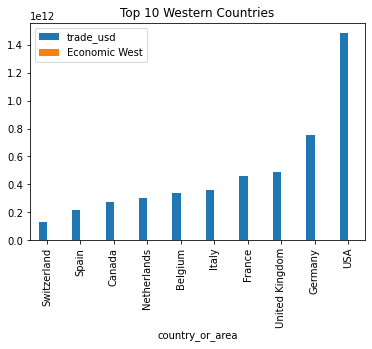

In [20]:
Top10W_import_df.sort_values(by='trade_usd').plot(kind='bar', title='Top 10 Western Countries')

In [21]:
# top 10 west imports
Top10N_import_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
Top10N_import_df = Top10N_import_df.loc[Top10N_import_df['commodity']== 'ALL COMMODITIES'] # filterd for all commodities import
Top10N_import_df = Top10N_import_df.loc[Top10N_import_df['Economic West'] == 0] # filtered for non-west
Top10N_import_df = Top10N_import_df.groupby('country_or_area')[['trade_usd', 'Economic West']].mean() # want the top 10 of each so we'll need to group by country and grap 
Top10N_import_df = Top10N_import_df.sort_values(by = 'trade_usd', ascending= False) # sorted values to grab the top 10
Top10N_import_df = Top10N_import_df.head(10)
Top10N_import_df.head(10)

,trade_usd,Economic West
country_or_area,,
China,777485582739.64,0.00
Japan,464939970939.14,0.00
"China, Hong Kong SAR",333373403705.29,0.00
Fmr Fed. Rep. of Germany,287450727333.33,0.00
Rep. of Korea,243841206529.28,0.00
Mexico,206791556881.74,0.00
Singapore,191333607385.68,0.00
"Other Asia, nes",190376891189.15,0.00
India,165411782154.59,0.00


<AxesSubplot:title={'center':'Top 10 Non-Western Countries'}, xlabel='country_or_area'>

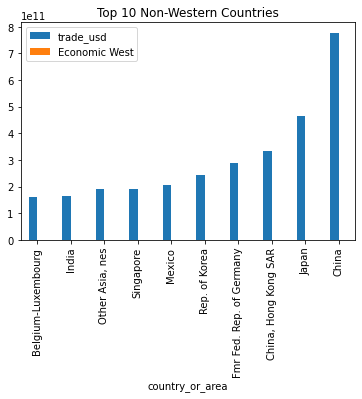

In [22]:
Top10N_import_df.sort_values(by='trade_usd').plot(kind='bar', title='Top 10 Non-Western Countries')

In [23]:
Top20_imports_df = pd.concat([Top10N_import_df, Top10W_import_df], axis=0, join="inner") # combining both the df's of the top10
Top20_imports_df.groupby('Economic West')['trade_usd'].mean() #checking number value of top 10 country group

Economic West
0.00   302039592399.38
1.00   481080529632.02
Name: trade_usd, dtype: float64

Figure I2

<AxesSubplot:title={'center':'Top10 Western VS Non-Western Countries Avg Trade_USD'}, xlabel='Economic West'>

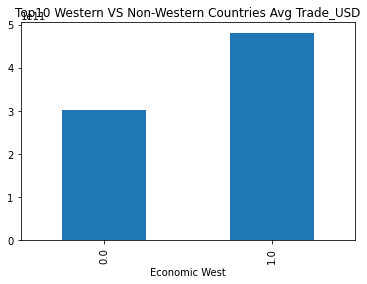

In [24]:
# graphed by comparing top 10 for each
Top20_imports_df.groupby('Economic West')['trade_usd'].mean().plot(kind='bar', title='Top10 Western VS Non-Western Countries Avg Trade_USD')

Graph I4

### Figure I2 & Graph I4 Analysis 

### Import Quantity

<AxesSubplot:title={'center':'Total Import quantity, West vs Non-West'}, xlabel='Economic West'>

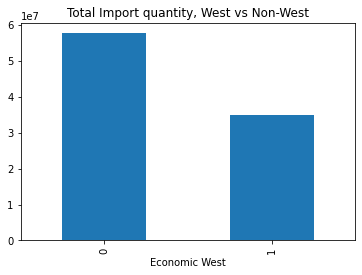

In [25]:
# filtering for all import commodities(usd) of each country and grouping by west(1) vs reast of the world(0) 
Import_quantity_df = df.loc[df['flow']=='Import'] # Filtered for Imports only
Import_quantity_df = Import_quantity_df.loc[Import_quantity_df['commodity']!= 'ALL COMMODITIES'] # filterd for not all commodities import

# created graph
Import_quantity_df.groupby('Economic West')['quantity'].mean().plot(kind='bar', title='Total Import quantity, West vs Non-West')

Graph I5

The Idea behind Import quantity is to determine is Non-Western countries are importing less costly commodities. Thus, the trade vale would be less than Western countries, but the avg quantity will not be. Based on the data frames below, Western countries are purchasing large amounts of more costly commodities such as natural gasses and oils, whereas Non-Western countries are buying large amounts of less costly commodities.

In [26]:
# non-western countries most imported items
NImport_quantity_df = Import_quantity_df.loc[Import_quantity_df['Economic West'] == 0]  # filtered for non-western
NImport_quantity_df.sort_values('quantity', ascending = False).head(20) # sorted for top 20 commodities

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Economic West
8070175,Albania,2008,960810,Ball point pens,Import,695785,126039.00,Number of items,60873365597449.00,96_miscellaneous_manufactured_articles,0
31958,Mexico,2015,010600,"Animals, live, except farm animals",Import,10744593,83700.00,Number of items,3296478270526.00,01_live_animals,0
31977,Mexico,2014,010600,"Animals, live, except farm animals",Import,13259029,NaN,Number of items,2833181983369.00,01_live_animals,0
31997,Mexico,2013,010600,"Animals, live, except farm animals",Import,15012041,NaN,Number of items,2064989013264.00,01_live_animals,0
2267749,India,1999,271000,"Oils petroleum, bituminous, distillates, excep...",Import,3215818548,1860133241000.00,Weight in kilograms,1860133241000.00,27_mineral_fuels_oils_distillation_products_etc,0
1985278,Kyrgyzstan,2001,240220,Cigarettes containing tobacco,Import,9470903,1434531599.00,Number of items,1434531599000.00,24_tobacco_and_manufactured_tobacco_substitutes,0
32016,Mexico,2012,010600,"Animals, live, except farm animals",Import,19628582,NaN,Number of items,1419119248936.00,01_live_animals,0
1985293,Kyrgyzstan,2000,240220,Cigarettes containing tobacco,Import,10337551,1355056784.00,Number of items,1355056784000.00,24_tobacco_and_manufactured_tobacco_substitutes,0
1712788,Georgia,1998,210690,Food preparations nes,Import,430617,1244420006146.00,Weight in kilograms,1244420006146.00,21_miscellaneous_edible_preparations,0
6274342,Bangladesh,1995,731930,"Pins, iron or steel, except safety pins",Import,8563495,0.00,Number of items,1225493452332.00,73_articles_of_iron_or_steel,0


In [27]:
# western countries most imported items
EImport_quantity_df = Import_quantity_df.loc[Import_quantity_df['Economic West'] == 1] # filtered for western countries 
EImport_quantity_df = EImport_quantity_df.loc[EImport_quantity_df['commodity'] != 'Commodities not specified according to kind'] # rwmoved a commodity as it gave no insight

# sorted for top 20 commodities
EImport_quantity_df.sort_values('quantity', ascending = False).head(20)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Economic West
2223444,Canada,1996,271121,Natural gas in gaseous state,Import,81373893,0.00,Volume in litres,1918262000000.00,27_mineral_fuels_oils_distillation_products_etc,1
2223359,Canada,1997,271121,Natural gas in gaseous state,Import,98579007,0.00,Volume in litres,942337000000.00,27_mineral_fuels_oils_distillation_products_etc,1
2223275,Canada,1998,271121,Natural gas in gaseous state,Import,66728040,0.00,Volume in litres,723162124250.00,27_mineral_fuels_oils_distillation_products_etc,1
2223620,Canada,1994,271121,Natural gas in gaseous state,Import,60677893,0.00,Volume in litres,663766000000.00,27_mineral_fuels_oils_distillation_products_etc,1
855012,USA,2001,100300,Barley,Import,90498183,614436593790.00,Weight in kilograms,614436593790.00,10_cereals,1
2223801,Canada,1992,271121,Natural gas in gaseous state,Import,41324112,0.00,Volume in litres,612541005824.00,27_mineral_fuels_oils_distillation_products_etc,1
2223188,Canada,1999,271121,Natural gas in gaseous state,Import,58192632,0.00,Volume in litres,611567000000.00,27_mineral_fuels_oils_distillation_products_etc,1
2223533,Canada,1995,271121,Natural gas in gaseous state,Import,33115809,0.00,Volume in litres,519947000000.00,27_mineral_fuels_oils_distillation_products_etc,1
2223711,Canada,1993,271121,Natural gas in gaseous state,Import,35848983,0.00,Volume in litres,467213000000.00,27_mineral_fuels_oils_distillation_products_etc,1
2223892,Canada,1991,271121,Natural gas in gaseous state,Import,28018151,0.00,Volume in litres,288599000000.00,27_mineral_fuels_oils_distillation_products_etc,1


## Conclusion/Errors/Ethical Concerns

Western countries import vastly more trade dollars(usd) on average than Non-Wester Countries. Western countries import $105,000,000,000 more. And the possibility of that being due to the larger number of Non-Western countries lowering the average was also not as impactful as the top 10 spenders from each were compared, and Western countries still spend more on imports. An interesting observation was that Western countries had a less quantity count of imports than Non-Western countries, and Western courtiers large test quantity imports are also gasses and fuel/oils whereas Non-Western countries were animals, metals, beverages/spirits, and a bit of fuel/oils.

### Errors

As this data set was very large there was a lot of decision making that needed to be done as to how countries were grouped and what needed to be filtered out. With the large amounts of data there countires that could have been missed or included that were or were not supposed to. For example EU-28 and So. African Customs Union as that could be doubling on the values that are already there. Some could have been missed during the cleaning and created bias in the data. 

### Possible Ethical Concerns

This data set and analysis displays a great difference in pricing of products and purchasing power of Countries on a categorical and individual level. Which in turn can be a positive insight As the data set displays quantities trade cost, commodity name and commodity category, can be used to bring insight on more efficient trade systems. The data can give access to what western countries are purchasing more of and in turn of and from a further analysis where the products are being exported from. A possible concern is regards to the positive countries that export of import less costly commodities can be taken advantage of for their low cost and hence would be the reason for many of the costly products are being imported into western countries.

### Tableau Link

https://public.tableau.com/app/profile/tarnbir.minhas/viz/WestVs_TheWorldImportUSD/Dashboard1?publish=yes

### Data Link

https://www.kaggle.com/code/alvanario/data-mining-analysis-techniques/data